In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [395]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [396]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [397]:
df.shape

(319795, 18)

In [398]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [400]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [401]:
cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity',
       'Asthma', 'KidneyDisease', 'SkinCancer']

In [402]:
for col in cols:
    print(df[col].value_counts())

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64
Smoking
No     187887
Yes    131908
Name: count, dtype: int64
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64
Stroke
No     307726
Yes     12069
Name: count, dtype: int64
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64
Sex
Female    167805
Male      151990
Name: count, dtype: int64
PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64
Asthma
No     276923
Yes     42872
Name: count, dtype: int64
KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64
SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64


## Use LabelEncoder for columns that have "yes" and "no" as values, this converts "No" to 0 and "Yes" to 1

In [404]:
from sklearn.preprocessing import LabelEncoder

for col in cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[[col]])

C:\Users\omair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\omair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [405]:
df['Diabetic'].value_counts()

Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [407]:
df['Race'].value_counts()

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64

In [408]:
df["GenHealth"].value_counts()

GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: count, dtype: int64

## Use Ordinal Encoder for "GenHealth" column because the values in this column can be ranked or have an order
### 0 = Poor, 1 = Fair, 2 = Excellent, 3 = Good, 4 = "Very Good"

In [410]:
from sklearn.preprocessing import OrdinalEncoder

rating = ['Poor', 'Fair', "Excellent", "Good", "Very good"]
ordinal_encoder = OrdinalEncoder(categories=[rating])
df["GenHealth"] = ordinal_encoder.fit_transform(df[['GenHealth']])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,4.0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,4.0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,1.0,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,3.0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,4.0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,Yes,0,1.0,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,No,1,4.0,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,No,1,3.0,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,No,0,3.0,12.0,0,0,0


## Apply one-hot encoding (dummy variables) to all remaining categorical features, as they are nominal and contain more than two distinct categories.

In [412]:
import pandas as pd

# Applying one-hot encoding
df = pd.get_dummies(df,columns=['AgeCategory', 'Race', 'Diabetic'], drop_first=True,dtype=int)

# Displaying the encoded DataFrame
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [413]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      319795 non-null  int32  
 1   BMI                               319795 non-null  float64
 2   Smoking                           319795 non-null  int32  
 3   AlcoholDrinking                   319795 non-null  int32  
 4   Stroke                            319795 non-null  int32  
 5   PhysicalHealth                    319795 non-null  float64
 6   MentalHealth                      319795 non-null  float64
 7   DiffWalking                       319795 non-null  int32  
 8   Sex                               319795 non-null  int32  
 9   PhysicalActivity                  319795 non-null  int32  
 10  GenHealth                         319795 non-null  float64
 11  SleepTime                         319795 non-null  f

In [415]:
# df['SkinCancer'] = df['SkinCancer'].map({'No': 0, 'Yes': 1})
# df['KidneyDisease'] = df['KidneyDisease'].map({'No': 0, 'Yes': 1})

# Logistic Regression

In [417]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


scaler = StandardScaler()
X = df.drop(columns=['HeartDisease'])
X = scaler.fit_transform(X)

y = df['HeartDisease']

In [418]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [419]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_sm, y_train_sm)


y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7434919245141419

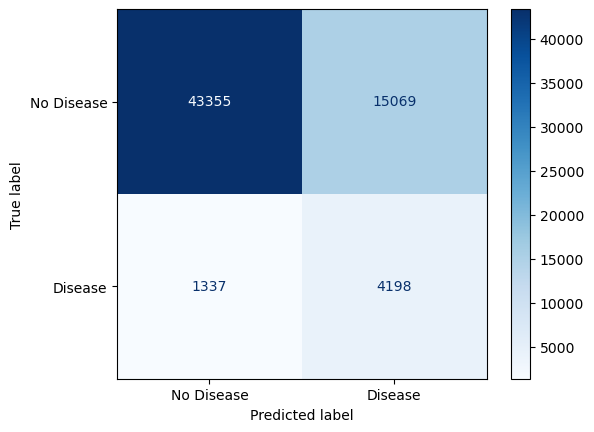

In [420]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues')


In [421]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58424
           1       0.22      0.76      0.34      5535

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.59     63959
weighted avg       0.90      0.74      0.80     63959



In [422]:
response = ['HeartDisease', 'KidneyDisease', 'SkinCancer']


for col in response:
    scaler = StandardScaler()
    X = df.drop(columns=[col])
    X = scaler.fit_transform(X)
    y = df[col]
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    print(col)
    print("")
    accuracy_score(y_test,y_pred)
    print(classification_report(y_test,y_pred))

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print("")
    print("\033[1m" + "Check for Overfitting:" + "\033[0m")
    print("")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("")

HeartDisease

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58289
           1       0.22      0.77      0.35      5670

    accuracy                           0.74     63959
   macro avg       0.60      0.75      0.59     63959
weighted avg       0.90      0.74      0.80     63959


Check for Overfitting:

Training Accuracy: 0.7444534780093497
Testing Accuracy: 0.7442893103394362

KidneyDisease

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     61580
           1       0.10      0.69      0.17      2379

    accuracy                           0.75     63959
   macro avg       0.54      0.72      0.51     63959
weighted avg       0.95      0.75      0.83     63959


Check for Overfitting:

Training Accuracy: 0.7538423052267859
Testing Accuracy: 0.7539986553886083

SkinCancer

              precision    recall  f1-score   support

           0       0.97      0.64      0.77     

### All three Logistic Regression models with AUC/ROC curve


HeartDisease

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58517
           1       0.22      0.77      0.34      5442

    accuracy                           0.74     63959
   macro avg       0.59      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959


Check for Overfitting:

Training Accuracy: 0.7432652167794994
Testing Accuracy: 0.742663268656483



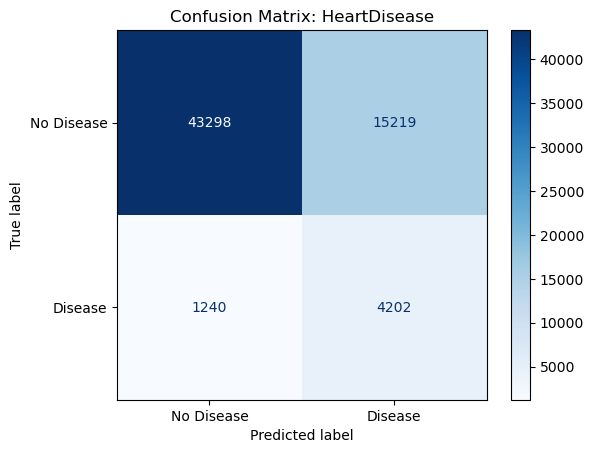

AUC: 0.8337


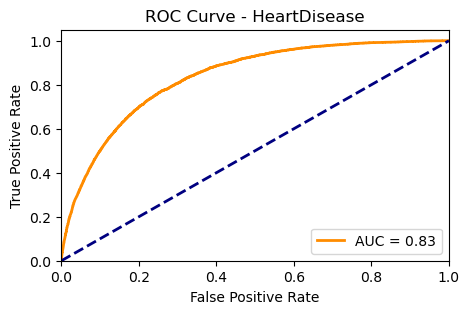


KidneyDisease

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     61569
           1       0.10      0.70      0.17      2390

    accuracy                           0.75     63959
   macro avg       0.54      0.72      0.51     63959
weighted avg       0.95      0.75      0.83     63959


Check for Overfitting:

Training Accuracy: 0.7542253631232508
Testing Accuracy: 0.7506996669741554



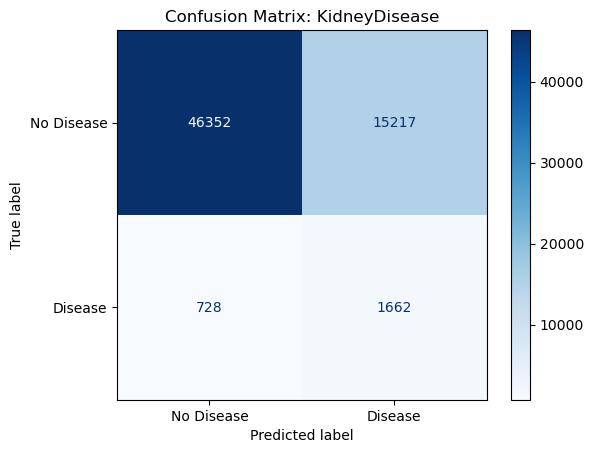

AUC: 0.7979


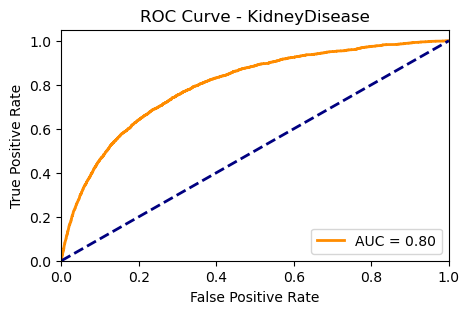


SkinCancer

              precision    recall  f1-score   support

           0       0.97      0.63      0.77     57981
           1       0.19      0.83      0.31      5978

    accuracy                           0.65     63959
   macro avg       0.58      0.73      0.54     63959
weighted avg       0.90      0.65      0.73     63959


Check for Overfitting:

Training Accuracy: 0.655642677340171
Testing Accuracy: 0.6526524804953173



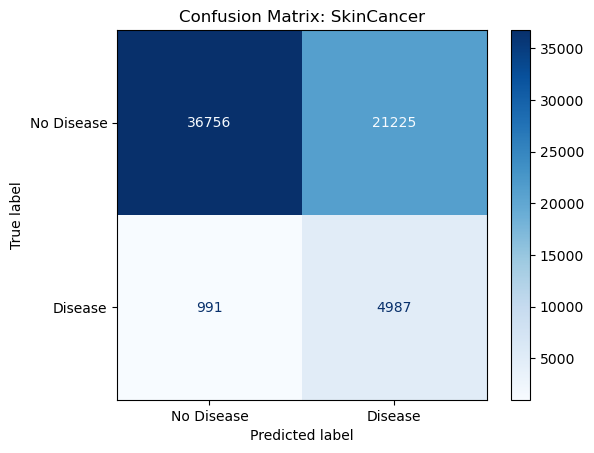

AUC: 0.8042


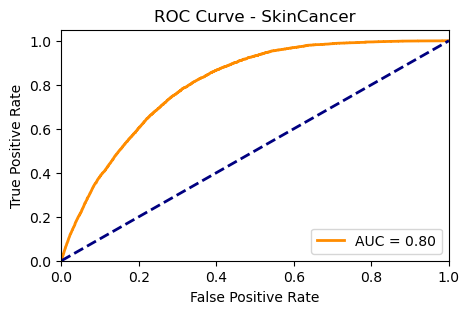

In [509]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

response = ['HeartDisease', 'KidneyDisease', 'SkinCancer']

for col in response:
    scaler = StandardScaler()
    X = df.drop(columns=[col])
    X = scaler.fit_transform(X)
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_logistic = model.decision_function(X_test) # get probabilities for class 1

    print("\n\033[1m" + col + "\033[0m")
    print("")
    print(classification_report(y_test, y_pred))

    ## Comparing testing vs training accuracy for overfitting
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print("")
    print("\033[1m" + "Check for Overfitting:" + "\033[0m")
    print("")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=['No Disease', 'Disease'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {col}")
    plt.show()

    # --- ROC Curve and AUC ---
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic)
    roc_auc = auc(fpr,tpr)
    print("\033[1m" + f"AUC: {roc_auc:.4f}" + "\033[0m")

    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {col}')
    plt.legend(loc="lower right")
    plt.show()


# Decision Tree

In [426]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(class_weight='balanced')

In [427]:
dc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [428]:
X3 = df.drop(columns=['HeartDisease'])
y3 = df['HeartDisease']

In [429]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3, test_size = 0.2)

In [430]:
dc.fit(X_train3,y_train3)

DecisionTreeClassifier(class_weight='balanced')

In [431]:
y_pred3 = dc.predict(X_test3)

In [432]:
print(confusion_matrix(y_test3,y_pred3))

[[54102  4346]
 [ 4237  1274]]


In [433]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     58448
           1       0.23      0.23      0.23      5511

    accuracy                           0.87     63959
   macro avg       0.58      0.58      0.58     63959
weighted avg       0.87      0.87      0.87     63959



In [434]:
dc.feature_importances_

array([0.29150489, 0.01806475, 0.00947134, 0.01942351, 0.05475583,
       0.05106304, 0.01429595, 0.02487926, 0.02081681, 0.13388221,
       0.07899293, 0.01571868, 0.00853254, 0.01732503, 0.00269089,
       0.00347924, 0.00330314, 0.00380823, 0.00345609, 0.00566852,
       0.00788224, 0.01495555, 0.02129089, 0.02693041, 0.02643741,
       0.03961138, 0.00296555, 0.00766094, 0.00633008, 0.00475265,
       0.01161516, 0.00588038, 0.04125059, 0.00130391])

In [435]:
print(f'Tree depth:', dc.get_depth())
print(f'Number of leaves:', dc.get_n_leaves())

Tree depth: 58
Number of leaves: 40457


### Check for Overfitting

In [437]:
train_accuracy = dc.score(X_train3, y_train3)
test_accuracy = dc.score(X_test3, y_test3)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9949186197407714
Testing Accuracy: 0.8658046561078191


## Adjusting alpha in order to address overfitting (pruning)

In [439]:
dc = DecisionTreeClassifier(ccp_alpha=0.04,class_weight='balanced')
dc.fit(X_train3,y_train3)
y_pred3 = dc.predict(X_test3)
print(confusion_matrix(y_test3,y_pred3))
print(classification_report(y_test3,y_pred3))

[[51369  7079]
 [ 3295  2216]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     58448
           1       0.24      0.40      0.30      5511

    accuracy                           0.84     63959
   macro avg       0.59      0.64      0.60     63959
weighted avg       0.88      0.84      0.86     63959



In [440]:
print(f'Tree depth:', dc.get_depth())
print(f'Number of leaves:', dc.get_n_leaves())

Tree depth: 1
Number of leaves: 2


In [441]:
train_accuracy = dc.score(X_train3, y_train3)
test_accuracy = dc.score(X_test3, y_test3)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8393619349896028
Testing Accuracy: 0.8378023421254241


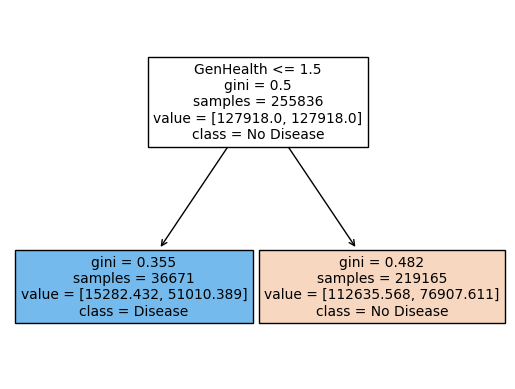

In [442]:
from sklearn import tree

feature_names = df.drop(columns=['HeartDisease']).columns
_ = tree.plot_tree(dc,feature_names = feature_names, class_names = {0: "No Disease", 1: "Disease"}, filled = True)

## Adjusting alpha when running the three different models

In [444]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3)

# Scale features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [445]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(ccp_alpha=0.04,class_weight='balanced')
clf.fit(X_train_res, y_train_res)

# Evaluate on test set
y_pred = clf.predict(X_test)

In [446]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[77220 10530]
 [ 4875  3314]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     87750
           1       0.24      0.40      0.30      8189

    accuracy                           0.84     95939
   macro avg       0.59      0.64      0.61     95939
weighted avg       0.88      0.84      0.86     95939



In [447]:
train_accuracy = clf.score(X_train_res, y_train_res)
test_accuracy = clf.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.6401315275171983
Testing Accuracy: 0.8394292206506218


HeartDisease
Training Accuracy: 0.7951951673316306
Testing Accuracy: 0.7870313428324248


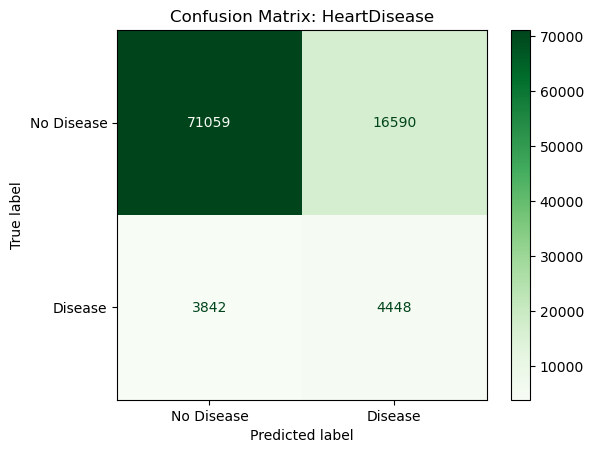



              precision    recall  f1-score   support

           0       0.95      0.81      0.87     87649
           1       0.21      0.54      0.30      8290

    accuracy                           0.79     95939
   macro avg       0.58      0.67      0.59     95939
weighted avg       0.88      0.79      0.82     95939

AUC: 0.7553


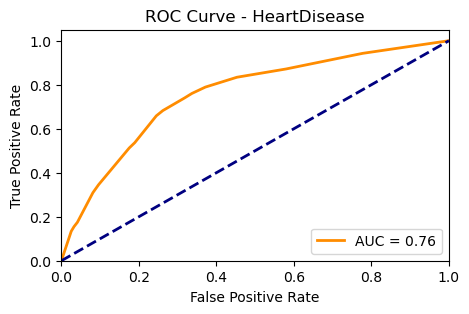


------------
KidneyDisease
Training Accuracy: 0.8089177292398176
Testing Accuracy: 0.7967562722146364


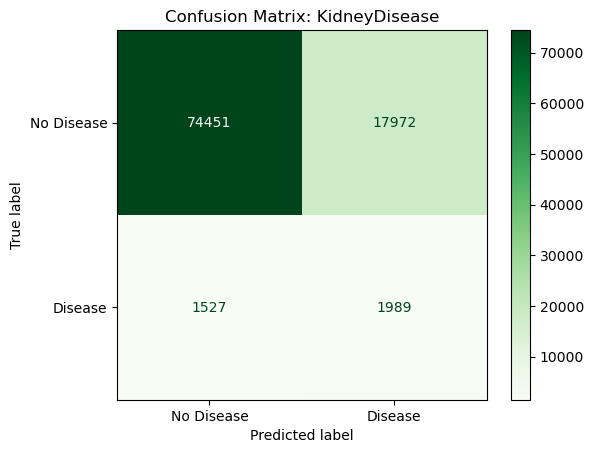



              precision    recall  f1-score   support

           0       0.98      0.81      0.88     92423
           1       0.10      0.57      0.17      3516

    accuracy                           0.80     95939
   macro avg       0.54      0.69      0.53     95939
weighted avg       0.95      0.80      0.86     95939

AUC: 0.7589


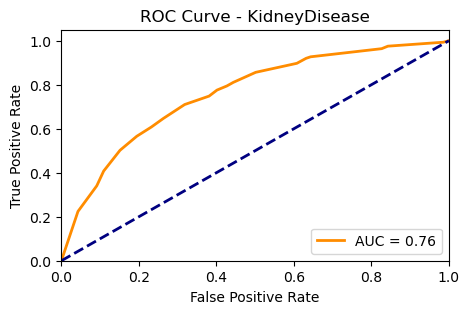


------------
SkinCancer
Training Accuracy: 0.7333433513822444
Testing Accuracy: 0.6728025099281836


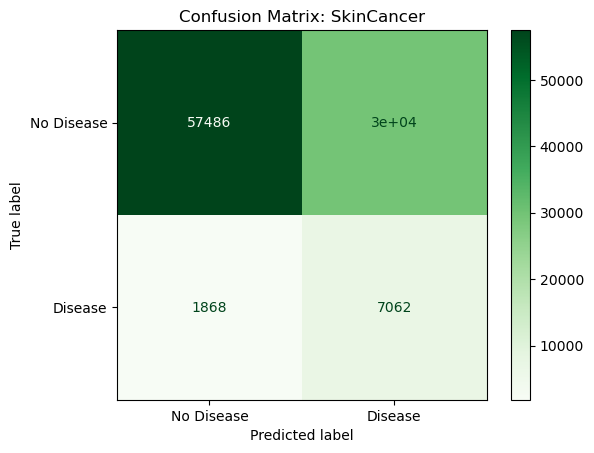



              precision    recall  f1-score   support

           0       0.97      0.66      0.79     87009
           1       0.19      0.79      0.31      8930

    accuracy                           0.67     95939
   macro avg       0.58      0.73      0.55     95939
weighted avg       0.90      0.67      0.74     95939

AUC: 0.7823


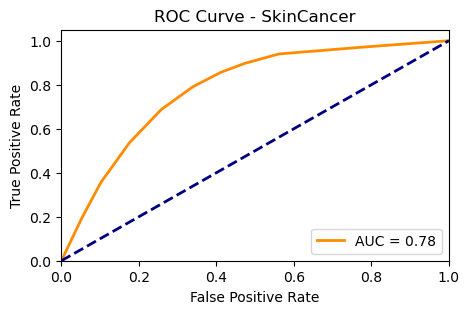


------------


In [516]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

columns = ['HeartDisease', 'KidneyDisease', 'SkinCancer']

for col in columns:
    # Separate features and target
    print(col)
    X3 = df.drop(columns=col)
    y3 = df[col]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Apply SMOTE to training data only
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    # Decision Tree
    clf = DecisionTreeClassifier(ccp_alpha=0.002, class_weight='balanced', random_state=42)
    clf.fit(X_train_res, y_train_res)
    
    # Evaluate
    y_pred = clf.predict(X_test)
    train_accuracy = clf.score(X_train_res, y_train_res)
    test_accuracy = clf.score(X_test, y_test)

    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)


    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=['No Disease', 'Disease'])
    disp.plot(cmap='Greens')
    plt.title(f"Confusion Matrix: {col}")
    plt.show()
    print("")
    print("")
    print(classification_report(y_test,y_pred))

    
    y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr,tpr)
    print("\033[1m" + f"AUC: {roc_auc:.4f}" + "\033[0m")
    plt.figure(figsize=(5,3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {col}')
    plt.legend(loc="lower right")
    plt.show()
    print("")
    print("------------")

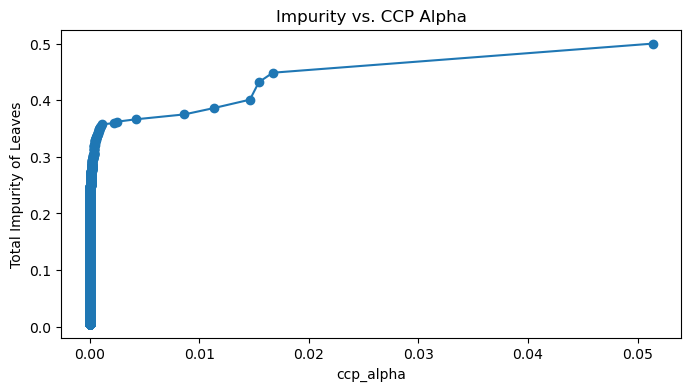

In [449]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Get cost complexity pruning path
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_res, y_train_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Optionally plot impurity vs alpha
plt.figure(figsize=(8,4))
plt.plot(ccp_alphas, impurities, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Impurity vs. CCP Alpha")
plt.show()
